# Staircase Image Classifier - Brandon Tang & Reiden Ong

## Importing Libraries and Model

In [1]:
import tensorflow as tf, numpy as np, keras, cv2, matplotlib.pyplot as plt
from skimage import io
from subprocess import call
IMG_SIZE = 299
class_names = ["curved", "negative", "straight"]

#Pull the git large file storage model
print("Downloading Model")
!git pull lfs

#Load Model
print("This might take some time...")
with tf.device('/CPU:0'):
    model = keras.models.load_model('stairs_model.h5')
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print("Model Loaded")

Using TensorFlow backend.


Model Loaded


## Functions for Predictions

In [2]:
def predict(img_array):  #nxnxc input (channels last) datatype = int
    #call("convert -resize " + str(IMG_SIZE) + "x" + str(IMG_SIZE) + " "+img_path + " " + img_path +"_modified.jpg", shell=True)
    #img_array = cv2.imread(img_path+"_modified.jpg")  # Convert to array
    
    try: #Some image will already come as greyscale
        img_array = np.array([np.average(i,1) for i in img_array]) #Convert to greyscale
    except:
        pass
    
    img = img_array/255.0

    img_display  = img.astype("float32")
    img = np.resize(img,(IMG_SIZE, IMG_SIZE, 1))
    #print("img shape:", img.shape)
    plt.imshow(img_display, cmap ='gray')
    plt.show()
    prediction = model.predict(np.asarray([img]))[0]
    print("Classes:      Curved    Negative     Straight")
    print("Prediction:", prediction, "Class:", class_names[np.argmax(prediction)])
    return class_names[np.argmax(prediction)]

def url_to_img(url):
    print ("downloading "+url)
    image = io.imread(url)
 
    return image

def predict_local(img_path="prediction/2.jpg"):
    img_array = cv2.imread(img_path)  # Convert to array
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
    class_name = predict(img_array)
    return class_name

def predict_web(url):
    img_array = url_to_img(url)
    #print("Web Image Shape:", img_array.shape)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
    class_name = predict(img_array)
    return class_name

## Predictions
### Predict Image From Online URL

downloading https://d3exkutavo4sli.cloudfront.net/wp-content/uploads/2015/05/dna-stairs.jpg


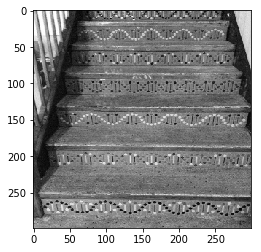

Classes:      Curved    Negative     Straight
Prediction: [3.2058575e-05 1.9926903e-08 9.9996793e-01] Class: straight


'straight'

In [6]:
url = "https://d3exkutavo4sli.cloudfront.net/wp-content/uploads/2015/05/dna-stairs.jpg"
predict_web(url)

### Predict Image from Local Storage

In [4]:
print("Choose images from here :)")
!ls prediction

Choose images from here :)
1.jpeg		     2.jpg_modified.jpg   5.jpg
1.jpeg_modified.jpg  3.jpeg		  5.jpg_modified.jpg
1.jpg		     3.jpeg_modified.jpg  6.jpg
1.jpg_modified.jpg   4.jpeg		  6.jpg_modified.jpg
2.jpeg		     4.jpeg_modified.jpg  7.jpg
2.jpeg_modified.jpg  4.jpg		  7.jpg_modified.jpg
2.jpg		     4.jpg_modified.jpg


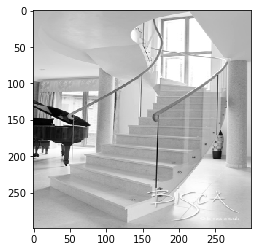

Classes:      Curved    Negative     Straight
Prediction: [1.5892614e-01 7.3671413e-06 8.4106648e-01] Class: straight


'straight'

In [5]:
predict_local(img_path="prediction/2.jpg")